In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data=pd.read_csv("Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# Check for mising value
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#correlation matrix
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


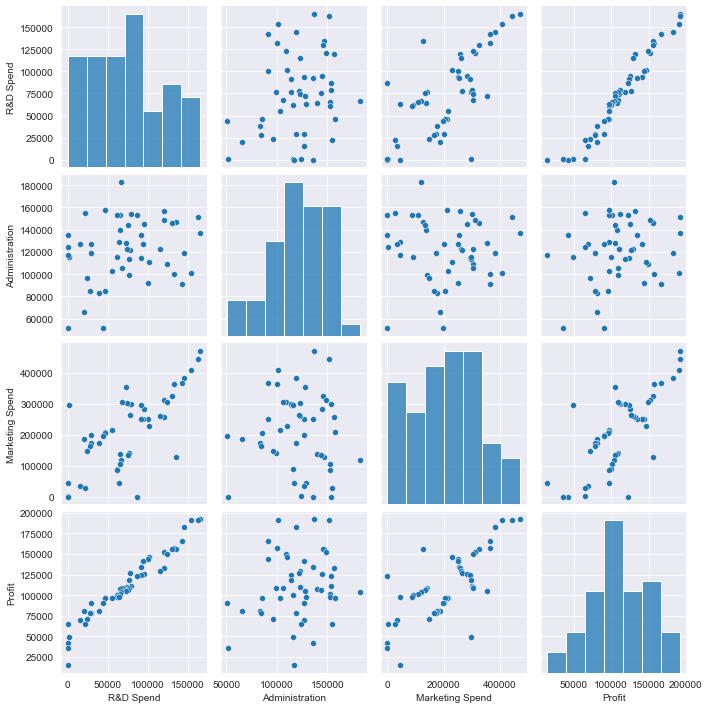

In [7]:
#Scatterplot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [8]:
data1=data.rename(columns={"R&D Spend":"RD","Marketing Spend":"MS"})

In [9]:
data1.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
#Build model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+Administration+MS',data=data1).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 31 May 2021   Prob (F-statistic):           4.53e-30
Time:                        21:51:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Coefficient
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [15]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [16]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)







# Simple Linear Regression Model

In [17]:
import statsmodels.formula.api as smf

In [20]:
ml_m=smf.ols('Profit~MS',data=data1).fit()
print(ml_m.tvalues,'\n',ml_m.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [22]:
ml_r=smf.ols('Profit~RD',data=data1).fit()
print(ml_r.tvalues,'\n',ml_r.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [23]:
ml_a=smf.ols('Profit~Administration',data=data1).fit()
print(ml_a.tvalues,'\n',ml_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [24]:
ml_mra=smf.ols('Profit~MS+RD+Administration',data=data1).fit()
print(ml_mra.tvalues,'\n',ml_mra.pvalues)

Intercept          7.626218
MS                 1.655077
RD                17.846374
Administration    -0.525507
dtype: float64 
 Intercept         1.057379e-09
MS                1.047168e-01
RD                2.634968e-22
Administration    6.017551e-01
dtype: float64


In [26]:
rsq_RD=smf.ols('RD~Administration+MS',data=data1).fit().rsquared
vif_RD=1/(1-rsq_RD)

In [27]:
rsq_Administration=smf.ols('Administration~MS+RD',data=data1).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

In [28]:
rsq_MS=smf.ols('MS~Administration+RD',data=data1).fit().rsquared
vif_MS=1/(1-rsq_MS)

In [29]:
# Storing vif values in a data frame 
d1={'Variable':['MS','Administration','RD'],'vif':[vif_MS,vif_Administration,vif_RD]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,vif
0,MS,2.326773
1,Administration,1.175091
2,RD,2.468903


# Residual Analysis

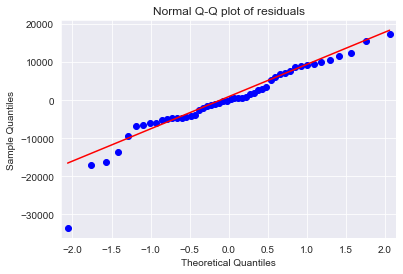

In [30]:
# Test for Normality of Residual (Q-Q plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [32]:
# Residuals plot for Homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

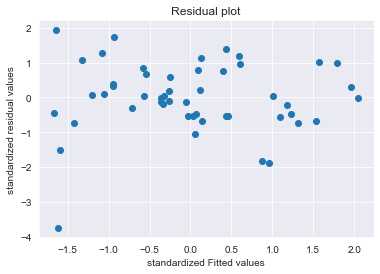

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Residuals VS Regressors

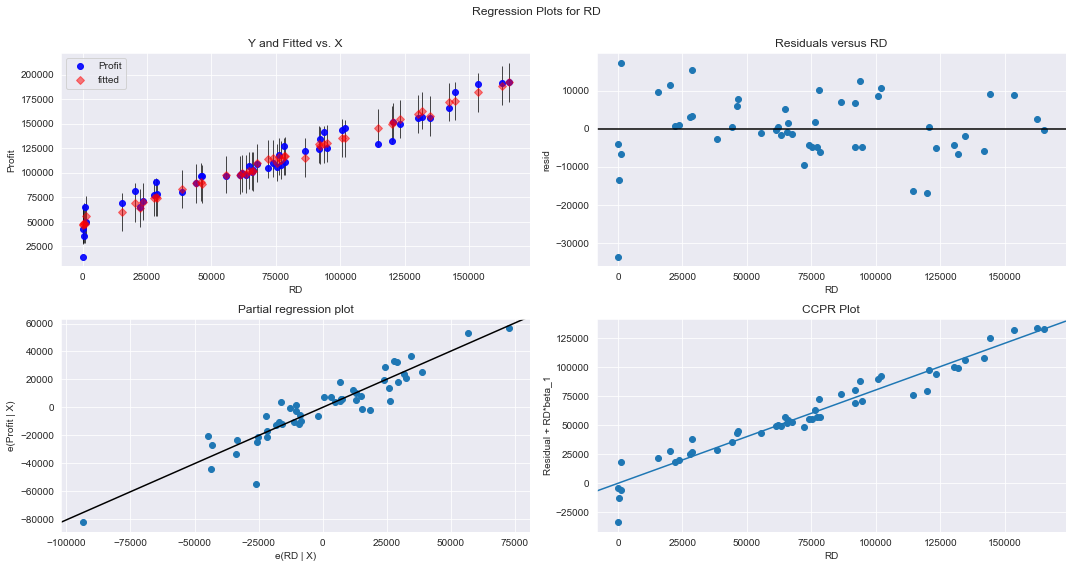

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

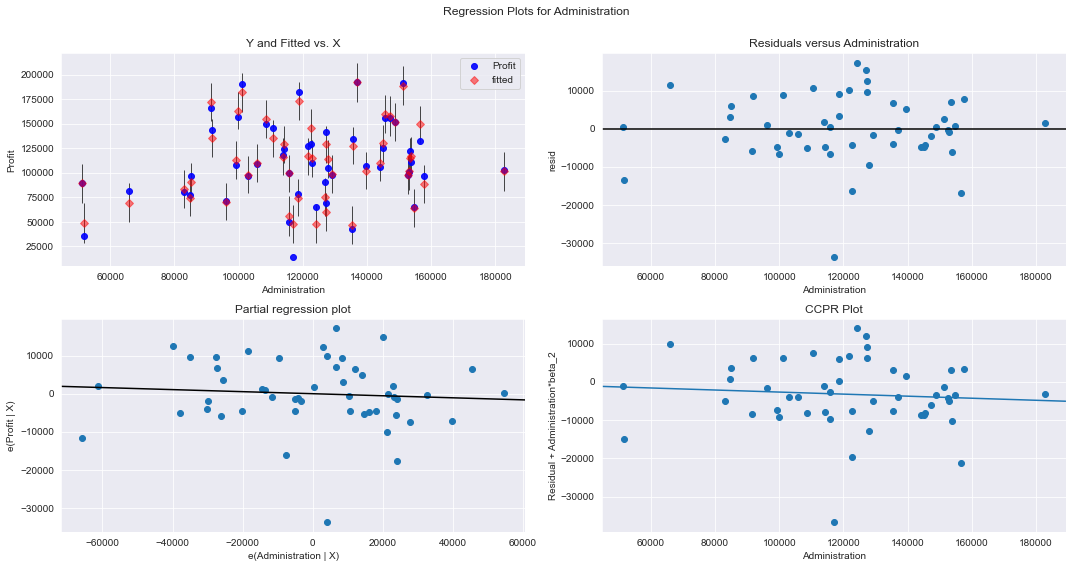

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

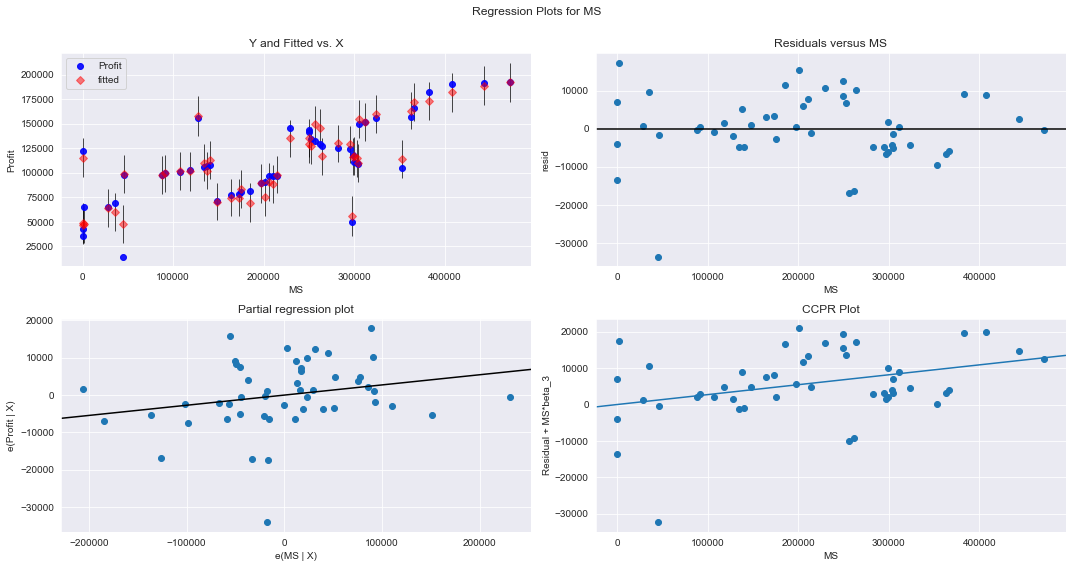

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

# Model Deletion Diagnostics

# Delecting influencers/Outliers

In [37]:
# Cook's Distance
model_influence=model.get_influence()
(C,_)=model_influence.cooks_distance

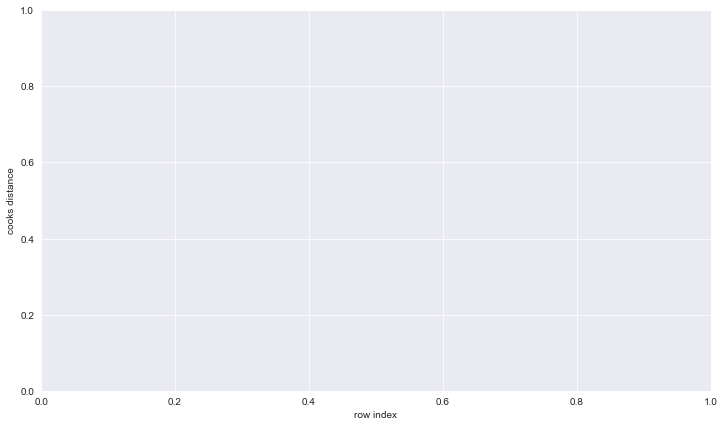

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.subplots(figsize=(12,7))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [40]:
(np.argmax(C),np.max(C))

(49, 0.28808229275432634)

# High influence points

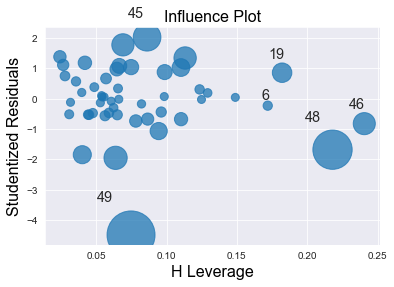

In [41]:
# High influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

### From the above plot we can say that points 48 and 49 are th einfluencers

In [43]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [44]:
leverage_cutoff

0.36

In [47]:
data1[data1.index.isin([49,48])]

,RD,Administration,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [48]:
data1.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [54]:
#load the data
data_new=data1.copy()

In [56]:
data_new.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
data_new.shape

(50, 5)

In [58]:
data1=data_new.drop(data_new.index[[49,48]],axis=0)

In [59]:
data1

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [60]:
data1.shape

(48, 5)

In [61]:
#Build model
import statsmodels.formula.api as smf
model1=smf.ols('Profit~Administration+RD+MS',data=data1).fit()

In [62]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.03e-31
Time:                        00:02:22   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
RD                 0.7895      0.036     21.718      0.000       0.716       0.863
MS                 0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
(model1.rsquared,model1.aic)

(0.9626766170294074, 994.6690439260116)

# Predicting for new data

In [70]:
# New data for prediction
new_data=pd.DataFrame({'Administration':124351.5,'RD':165421.2,'MS':3961521.2},index=[1])

In [71]:
model1.predict(new_data)

1    248749.440322
dtype: float64

In [72]:
pred_y=model1.predict(data_new)

In [75]:
model1.predict(data_new.iloc[0:5,])

0    188939.277484
1    185378.579127
2    180724.354190
3    172036.176973
4    171688.341312
dtype: float64

In [76]:
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563
